## Web Scraping and Structured Data 
Retrieved and transformed data from pdf to csv formats

In [1]:
# Load required packages
import requests
from bs4 import BeautifulSoup
from path import Path

In [2]:
# Create a target URL
url = 'https://www.dmr.nd.gov/oilgas/stats/statisticsvw.asp'

# Make HTTP GET request to the target URL
response = requests.get(url)

# Parse content into text
content = BeautifulSoup(response.text, 'lxml')

# Extract URLs referencing PDF documents
all_urls = content.find_all('a')

# loop over all URLs
for url in all_urls:
    # Try URLs containing 'href' attribute
    try:
        # Get only those URLs containing 'county' in 'href' attribute
        if 'county' in url['href']:
            # Initiate PDF URL
            pdf_url = ''
            
            # Append base URL if no 'https' available in URL
            if 'https' not in url['href']:
                pdf_url = 'https://dmr.nd.gov/oilgas/stats/' + url['href']
            
            # Create HTTP GET request to fetch PDF bytes
            print('HTTP GET:', pdf_url)          
            pdf_response = requests.get(pdf_url)
            
            # Extract PDF file name
            file_name = Path(pdf_url).stem.split('/')[-1]
            
            # Write PDF to local file
            with open(file_name + '.pdf', 'wb') as file:
                file.write(pdf_response.content)
    
    # Otherwise, skip other URLs
    except:
        pass

HTTP GET: https://dmr.nd.gov/oilgas/stats/countymot.pdf
HTTP GET: https://dmr.nd.gov/oilgas/stats/countymgt.pdf


## Data Analytics and Visualization
Various plots for oil and gas production

In [3]:
# Load required packages
from tabula import read_pdf
from tabula import convert_into
import pandas as pd
from datetime import datetime

In [4]:
# Read downloaded PDF files of county oil and gas
pdf_oil = read_pdf('countymot.pdf', pages = 'all')
pdf_gas = read_pdf('countymgt.pdf', pages = 'all')

# Convert PDF into CSV file
csv_oil = convert_into('countymot.pdf', 'countymot.csv', output_format = 'csv', pages = 'all')
csv_gas = convert_into('countymgt.pdf', 'countymgt.csv', output_format = 'csv', pages = 'all')

In [5]:
# Read county oil data frame
df_oil = pd.read_csv('countymot.csv')

# Clean headers that included in multiple rows
df_oil = df_oil[df_oil.ne(df_oil.columns).any(1)]

# Convert column 'date' to timedate format and set as an index
df_oil['Date'] = pd.to_datetime(df_oil['Date'], format = '%m-%Y', errors = 'coerce').dt.to_period('m')
df_oil.set_index('Date', inplace = True)

# Convert rest of the columns to integers
df_oil = df_oil.apply(pd.to_numeric, errors = 'coerce', axis = 1)
df_oil.head()

,Adams,Billings,Bottineau,Bowman,Burke,Divide,Dunn,Golden Valley,Hettinger,McHenry,McKenzie,McLean,Mercer,Mountrail,Renville,Slope,Stark,Ward,Williams
Date,,,,,,,,,,,,,,,,,,,
1951-04,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3092
1951-07,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2350
1951-08,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6259
1951-09,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3508
1951-10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4129


In [6]:
df_oil.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 840 entries, 1951-04 to 2021-05
Freq: M
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Adams          840 non-null    int64
 1   Billings       840 non-null    int64
 2   Bottineau      840 non-null    int64
 3   Bowman         840 non-null    int64
 4   Burke          840 non-null    int64
 5   Divide         840 non-null    int64
 6   Dunn           840 non-null    int64
 7   Golden Valley  840 non-null    int64
 8   Hettinger      840 non-null    int64
 9   McHenry        840 non-null    int64
 10  McKenzie       840 non-null    int64
 11  McLean         840 non-null    int64
 12  Mercer         840 non-null    int64
 13  Mountrail      840 non-null    int64
 14  Renville       840 non-null    int64
 15  Slope          840 non-null    int64
 16  Stark          840 non-null    int64
 17  Ward           840 non-null    int64
 18  Williams       840 non-null    

In [7]:
# Read county gas data frame
df_gas = pd.read_csv('countymgt.csv')

# Clean headers that included in multiple rows
df_gas = df_gas[df_gas.ne(df_gas.columns).any(1)]

# Convert column 'date' to timedate format and set as an index
df_gas['Date'] = pd.to_datetime(df_gas['Date'], format = '%m-%Y', errors = 'coerce').dt.to_period('m')
df_gas.set_index('Date', inplace = True)

# Convert rest of the columns to integers
df_gas = df_gas.apply(pd.to_numeric, errors = 'coerce', axis = 1)
df_gas.head()

,Adams,Billings,Bottineau,Bowman,Burke,Divide,Dunn,Golden Valley,Hettinger,McHenry,McKenzie,McLean,Mercer,Mountrail,Renville,Slope,Stark,Ward,Williams
Date,,,,,,,,,,,,,,,,,,,
1990-01,0,819902,9597,100608,218690,208961,332565,31128,0,42,2301627,0,0,142459,26986,1746,52989,10853,1311253
1990-02,0,735014,9010,91497,187843,227928,297531,27583,0,38,2121553,0,0,119235,24586,1950,50463,7921,1164206
1990-03,0,804660,9913,87392,221765,250965,328950,29462,0,42,2353765,0,0,138674,31553,2096,55555,9358,1326282
1990-04,0,788770,10114,97198,232926,242055,298154,28749,0,41,2326079,0,0,144444,33679,2022,54467,8524,1230650
1990-05,0,817471,9914,108093,243168,270307,311030,29715,0,42,2451679,0,0,156896,39381,2162,53987,8454,1221379


In [8]:
df_gas.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 377 entries, 1990-01 to 2021-05
Freq: M
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Adams          377 non-null    int64
 1   Billings       377 non-null    int64
 2   Bottineau      377 non-null    int64
 3   Bowman         377 non-null    int64
 4   Burke          377 non-null    int64
 5   Divide         377 non-null    int64
 6   Dunn           377 non-null    int64
 7   Golden Valley  377 non-null    int64
 8   Hettinger      377 non-null    int64
 9   McHenry        377 non-null    int64
 10  McKenzie       377 non-null    int64
 11  McLean         377 non-null    int64
 12  Mercer         377 non-null    int64
 13  Mountrail      377 non-null    int64
 14  Renville       377 non-null    int64
 15  Slope          377 non-null    int64
 16  Stark          377 non-null    int64
 17  Ward           377 non-null    int64
 18  Williams       377 non-null    

In [9]:
# Summarise total oil production per year
df_oil_year = df_oil.groupby(df_oil.index.year).sum()

# Convert to thousand barrels per day by year index
df_oil_day = (df_oil_year / 365) / 1000
df_oil_day.head()

,Adams,Billings,Bottineau,Bowman,Burke,Divide,Dunn,Golden Valley,Hettinger,McHenry,McKenzie,McLean,Mercer,Mountrail,Renville,Slope,Stark,Ward,Williams
Date,,,,,,,,,,,,,,,,,,,
1951,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.071770
1952,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.055652,0.0,0.0,0.271290,0.000000,0.0,0.000000,0.0,4.066359
1953,0.0,0.077463,0.060477,0.0,0.040605,0.0,0.0,0.0,0.0,0.0,0.243137,0.0,0.0,2.419219,0.000000,0.0,0.000000,0.0,11.613430
1954,0.0,0.396219,0.112532,0.0,0.085488,0.0,0.0,0.0,0.0,0.0,1.064696,0.0,0.0,3.522633,0.000000,0.0,0.001033,0.0,11.324104
1955,0.0,0.626096,0.950121,0.0,0.298690,0.0,0.0,0.0,0.0,0.0,2.467551,0.0,0.0,6.286701,0.008721,0.0,0.014690,0.0,19.974584


In [10]:
# Summarise total gas production per year
df_gas_year = df_gas.groupby(df_gas.index.year).sum()

# Convert to million cubic feet per day by year index
df_gas_day = (df_gas_year / 365) 
df_gas_day.head()

,Adams,Billings,Bottineau,Bowman,Burke,Divide,Dunn,Golden Valley,Hettinger,McHenry,McKenzie,McLean,Mercer,Mountrail,Renville,Slope,Stark,Ward,Williams
Date,,,,,,,,,,,,,,,,,,,
1990,0.0,26874.854795,328.432877,3326.093151,7589.334247,8567.246575,10402.520548,905.586301,0.000000,1.358904,76676.800000,64.435616,0.0,4576.021918,1425.660274,65.857534,1531.816438,278.265753,37876.909589
1991,0.0,29300.208219,717.002740,3265.375342,7539.438356,10300.805479,10046.868493,813.172603,0.000000,1.454795,70705.641096,852.164384,0.0,3645.243836,1439.509589,62.400000,1260.339726,270.589041,32874.326027
1992,0.0,30504.432877,1119.189041,3420.309589,6768.854795,11427.180822,8203.273973,904.197260,0.084932,1.339726,63505.868493,719.805479,0.0,2934.309589,1044.835616,37.320548,1363.312329,230.657534,33109.638356
1993,0.0,28197.638356,1104.205479,4203.594521,6707.602740,11165.172603,7451.158904,746.071233,0.000000,1.284932,65692.484932,556.504110,0.0,3393.523288,858.942466,12.986301,1835.750685,176.879452,45686.706849
1994,0.0,24877.106849,908.315068,4623.610959,6632.926027,10930.339726,6316.580822,676.156164,0.000000,9.405479,59076.158904,383.909589,0.0,2621.186301,670.328767,13.032877,1565.071233,158.383562,46834.060274


In [11]:
# Load required packages
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [12]:
# Create color pallettes and figure settings
colors = ['black', 'maroon', 'orangered', 'sienna', 'saddlebrown', 'peru', 'orange', 'pink', 'olive', 'khaki',
         'darkgreen', 'darkseagreen', 'lime', 'dodgerblue', 'darkslategray', 'slateblue', 'blue', 'yellow', 'darkmagenta']

plt.rcParams['figure.figsize'] = (15, 8)
plt.style.use('bmh')

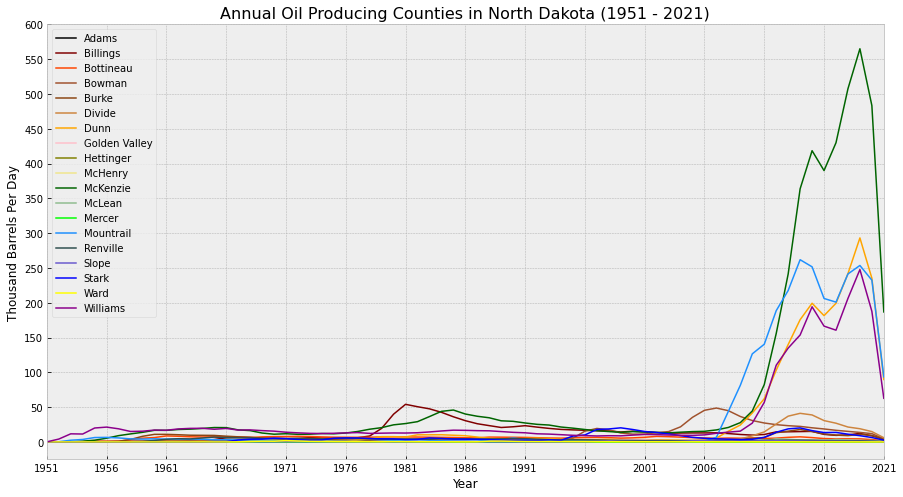

In [13]:
# Plot year vs county oil production (1951-2021)
ax_1 = df_oil_day.plot(linewidth = 1.5, fontsize = 10, color = colors)
ax_1.set_title('Annual Oil Producing Counties in North Dakota (1951 - 2021)', fontsize = 16)
ax_1.set_xlabel('Year', fontsize = 12)
ax_1.set_ylabel('Thousand Barrels Per Day', fontsize = 12)
ax_1.set_xlim(1951, 2021)
ax_1.set_ylim(-25, 600)
dim_x = np.arange(1951, 2022, 5)
dim_y = np.arange(0, 650, 50)
ax_1.set_xticks(dim_x)
ax_1.set_yticks(dim_y)
ax_1.legend(fontsize = 10)

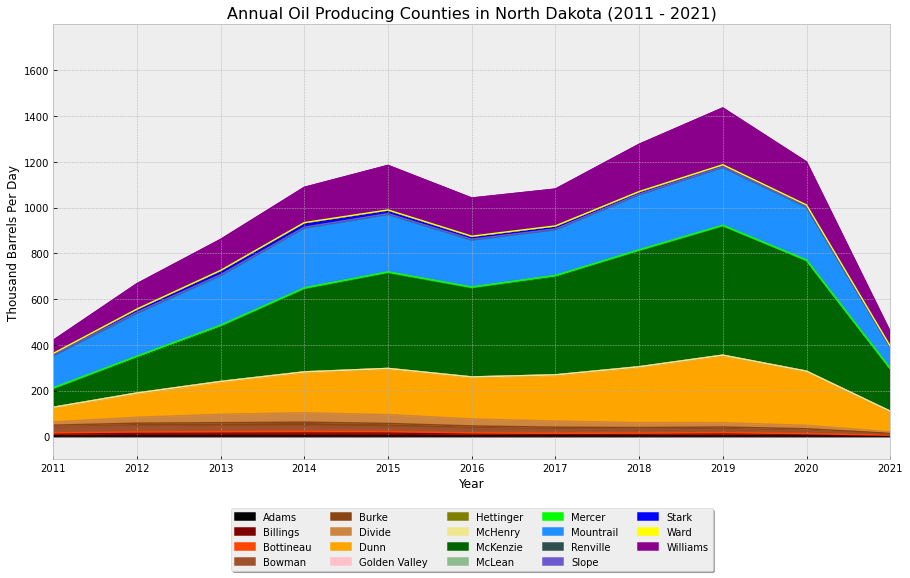

In [14]:
# Let's see the county oil production for the past 10 years
ax_2 = df_oil_day.plot.area(linewidth = 1.5, fontsize = 10, color = colors)
ax_2.set_title('Annual Oil Producing Counties in North Dakota (2011 - 2021)', fontsize = 16)
ax_2.set_xlabel('Year', fontsize = 12)
ax_2.set_ylabel('Thousand Barrels Per Day', fontsize = 12)
ax_2.set_xlim(2011, 2021)
ax_2.set_ylim(-100, 1800)
dim_x = np.arange(2011, 2022, 1)
dim_y = np.arange(0, 1700, 200)
ax_2.set_xticks(dim_x)
ax_2.set_yticks(dim_y)
ax_2.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),
          fancybox=True, shadow=True, ncol=5)

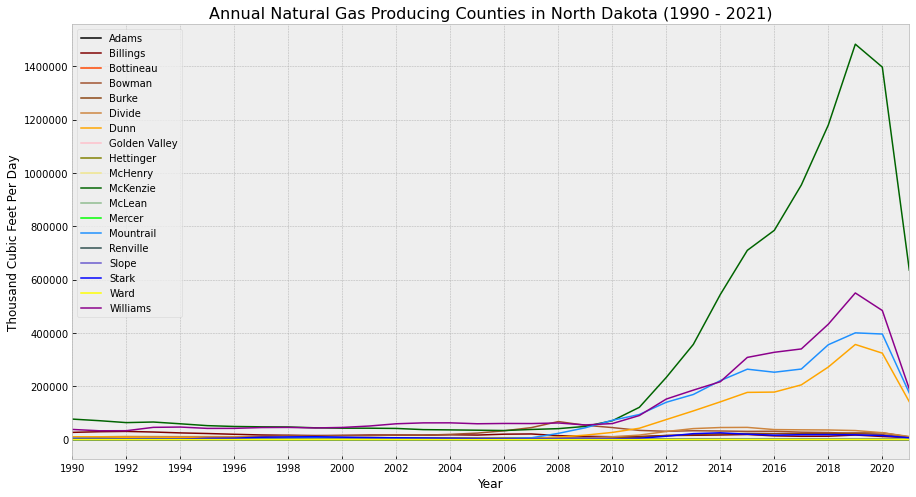

In [15]:
# Plot year vs county gas production (1951-2021)
ax_3 = df_gas_day.plot(linewidth = 1.5, fontsize = 10, color = colors)
ax_3.set_title('Annual Natural Gas Producing Counties in North Dakota (1990 - 2021)', fontsize = 16)
ax_3.set_xlabel('Year', fontsize = 12)
ax_3.set_ylabel('Thousand Cubic Feet Per Day', fontsize = 12)
ax_3.set_xlim(1990, 2021)
dim_x = np.arange(1990, 2022, 2)
ax_3.set_xticks(dim_x)
ax_3.ticklabel_format(style = 'plain')
ax_3.legend(fontsize = 10)

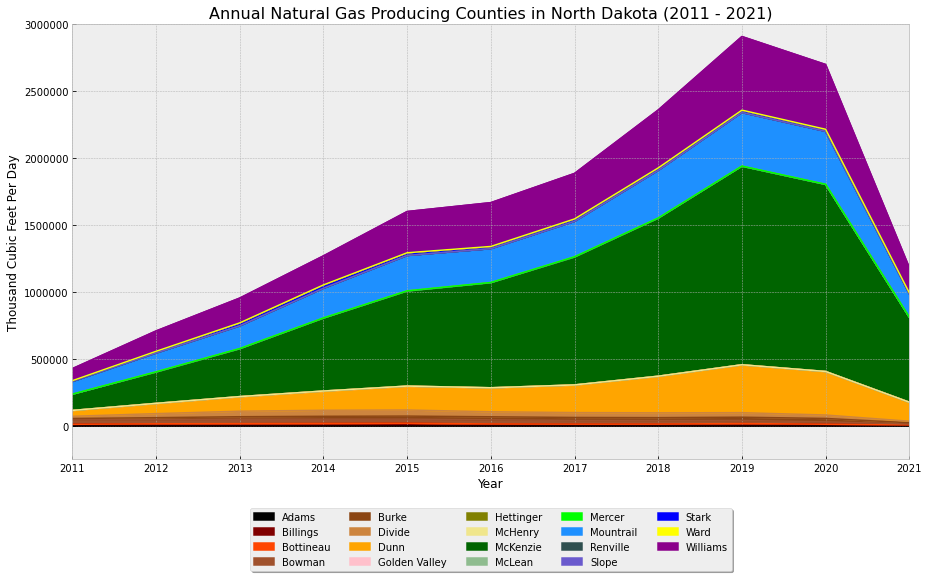

In [16]:
# Let's see the county natural gas production for the past 10 years
ax_4 = df_gas_day.plot.area(linewidth = 1.5, fontsize = 10, color = colors)
ax_4.set_title('Annual Natural Gas Producing Counties in North Dakota (2011 - 2021)', fontsize = 16)
ax_4.set_xlabel('Year', fontsize = 12)
ax_4.set_ylabel('Thousand Cubic Feet Per Day', fontsize = 12)
ax_4.set_xlim(2011, 2021)
ax_4.set_ylim(-250000, 3000000)
dim_x = np.arange(2011, 2022, 1)
ax_4.set_xticks(dim_x)
ax_4.ticklabel_format(style = 'plain')
ax_4.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),
          fancybox=True, shadow=True, ncol=5)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, '2011'),
  Text(1, 0, '2012'),
  Text(2, 0, '2013'),
  Text(3, 0, '2014'),
  Text(4, 0, '2015'),
  Text(5, 0, '2016'),
  Text(6, 0, '2017'),
  Text(7, 0, '2018'),
  Text(8, 0, '2019'),
  Text(9, 0, '2020'),
  Text(10, 0, '2021')])

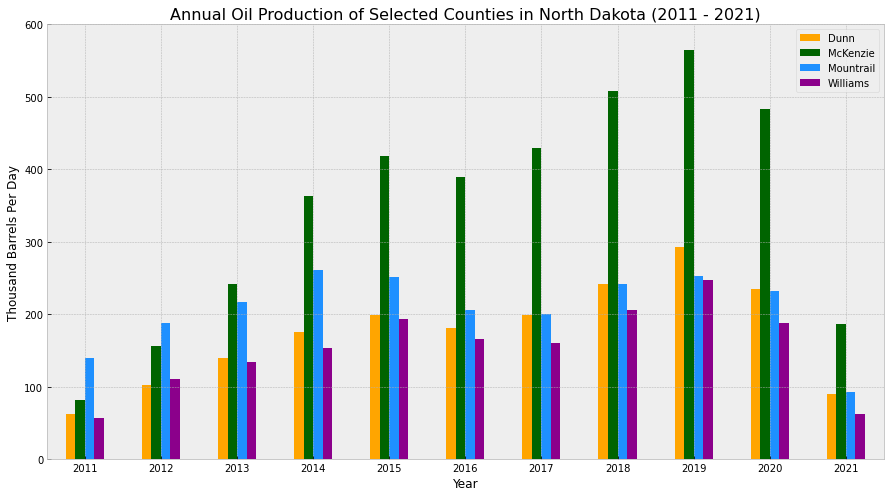

In [17]:
# Create oil production histogram based on selected counties 
df_oil_county = df_oil_day.loc['2011':'2021', ['Dunn', 'McKenzie', 'Mountrail', 'Williams']]
ax_5 = df_oil_county.plot.bar(linewidth = 1.5, fontsize = 10, color = ['orange', 'darkgreen', 'dodgerblue', 'darkmagenta'])
ax_5.set_title('Annual Oil Production of Selected Counties in North Dakota (2011 - 2021)', fontsize = 16)
ax_5.set_xlabel('Year', fontsize = 12)
ax_5.set_ylabel('Thousand Barrels Per Day', fontsize = 12)
ax_5.set_ylim(0, 600)
plt.xticks(rotation = 'horizontal')

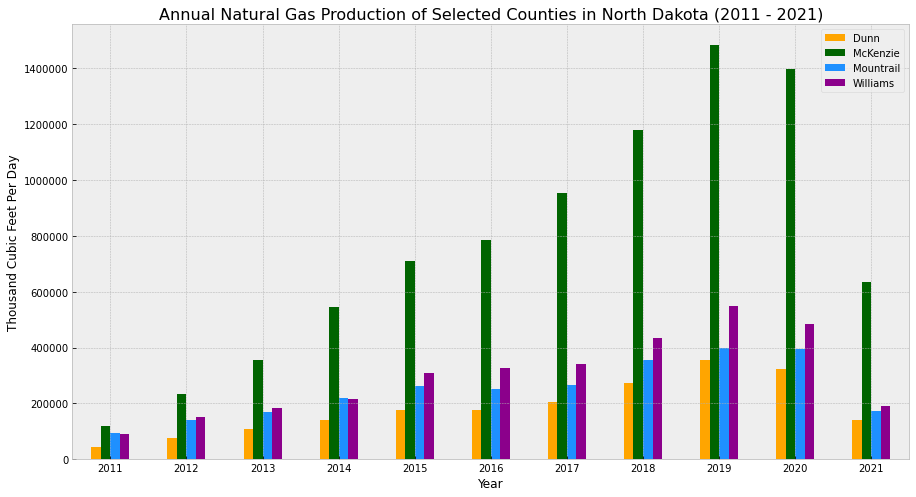

In [18]:
# Create natural gas production histogram based on selected counties 
df_gas_county = df_gas_day.loc['2011':'2021', ['Dunn', 'McKenzie', 'Mountrail', 'Williams']]
ax_6 = df_gas_county.plot.bar(linewidth = 1.5, fontsize = 10, color = ['orange', 'darkgreen', 'dodgerblue', 'darkmagenta'])
ax_6.set_title('Annual Natural Gas Production of Selected Counties in North Dakota (2011 - 2021)', fontsize = 16)
ax_6.set_xlabel('Year', fontsize = 12)
ax_6.set_ylabel('Thousand Cubic Feet Per Day', fontsize = 12)
plt.xticks(rotation = 'horizontal')
plt.ticklabel_format(style = 'plain', axis = 'y')

In [19]:
# Transpose data frame for further analysis
df_oil_T = df_oil_day.T
df_oil_T.head()

Date,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
Adams,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Billings,0.0,0.0,0.077463,0.396219,0.626096,0.445529,0.620553,1.013945,1.001921,1.310770,...,14.386540,14.532345,14.831362,15.127825,10.801849,9.429329,10.062433,12.220770,8.792915,4.414003
Bottineau,0.0,0.0,0.060477,0.112532,0.950121,0.991422,1.096603,3.129364,5.357271,6.272723,...,5.425085,6.597515,7.280819,6.193271,4.808162,4.360953,4.454337,4.371521,3.332364,1.484616
Bowman,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.041679,0.032430,0.145833,...,24.800214,23.300477,22.286778,20.274419,18.608844,16.656868,15.129186,13.615696,11.884447,4.512710
Burke,0.0,0.0,0.040605,0.085488,0.298690,0.324863,0.822882,3.503134,8.027351,10.857789,...,13.218197,15.409819,17.853542,14.934699,11.459082,9.754858,9.018995,10.764134,9.270296,3.266430


In [20]:
# Find values in 2021
df_oil_pie = df_oil_T.iloc[:, -1]
df_oil_pie

Adams              0.000000
Billings           4.414003
Bottineau          1.484616
Bowman             4.512710
Burke              3.266430
Divide             5.999260
Dunn              89.728926
Golden Valley      0.621167
Hettinger          0.000000
McHenry            0.062236
McKenzie         186.767151
McLean             0.813819
Mercer             0.000000
Mountrail         93.424000
Renville           0.538647
Slope              0.269663
Stark              2.519477
Ward               0.016910
Williams          62.649093
Name: 2021, dtype: float64

In [29]:
prod_oil = df_oil_pie.sum()
prod_oil.round()

457.0

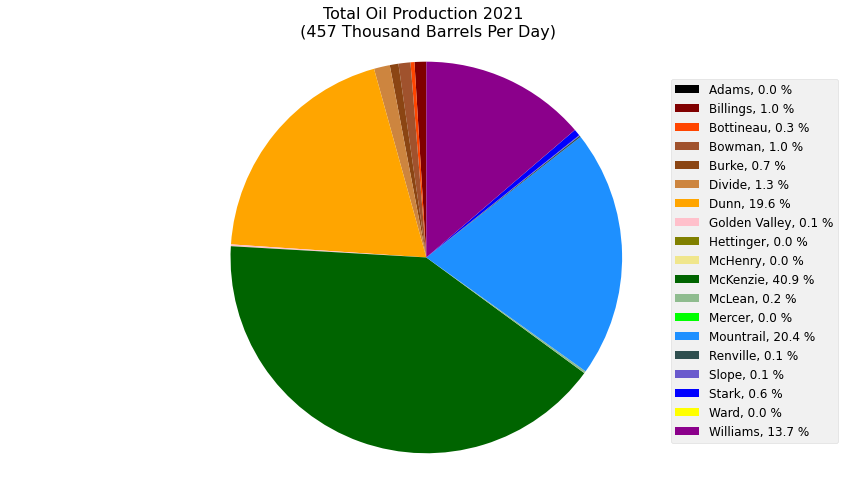

In [26]:
# Create a pie chart for 2021 total oil production
ax_7 = df_oil_pie.plot.pie(y = 2021, colors = colors, startangle = 90, labeldistance = None)
ax_7.set_title('Total Oil Production 2021 \n (457 Thousand Barrels Per Day)' , fontsize = 16)
ax_7.set_ylabel('')
plt.axis('equal')

# Calculate percentage of county values and store it to legend
percents = df_oil_pie.to_numpy() * 100 / df_oil_pie.to_numpy().sum()
labels = ['%s, %1.1f %%' % (l, s) for l, s in zip(df_oil_pie.index, percents)]
plt.legend(bbox_to_anchor = (0.9,0.5), loc = 'center right', fontsize = 12, bbox_transform = plt.gcf().transFigure,
           labels = labels)

In [22]:
# Transpose data frame for further analysis
df_gas_T = df_gas_day.T
df_gas_T.head()

Date,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
Adams,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Billings,26874.854795,29300.208219,30504.432877,28197.638356,24877.106849,22566.079452,19695.945205,17130.747945,15968.019178,14989.430137,...,14990.238356,15925.536986,17121.871233,18885.328767,13769.964384,12153.331507,12406.186301,16941.276712,11426.457534,7299.361644
Bottineau,328.432877,717.002740,1119.189041,1104.205479,908.315068,652.454795,566.035616,489.720548,498.468493,493.528767,...,416.493151,843.520548,985.101370,750.547945,551.547945,636.216438,670.378082,563.739726,503.791781,241.802740
Bowman,3326.093151,3265.375342,3420.309589,4203.594521,4623.610959,6684.128767,9960.602740,11665.326027,15001.019178,13276.920548,...,30880.706849,32973.701370,32001.526027,30630.038356,31081.715068,27613.575342,26321.416438,22769.194521,18321.273973,6020.005479
Burke,7589.334247,7539.438356,6768.854795,6707.602740,6632.926027,6922.709589,6285.315068,5740.446575,6133.205479,6478.871233,...,14932.295890,18614.035616,21381.961644,22715.967123,22376.205479,22371.063014,22024.219178,24469.246575,25173.706849,9714.734247


In [23]:
# Find values in 2021
df_gas_pie = df_gas_T.iloc[:, -1]
df_gas_pie

Adams                 0.000000
Billings           7299.361644
Bottineau           241.802740
Bowman             6020.005479
Burke              9714.734247
Divide            11374.778082
Dunn             141569.652055
Golden Valley       542.463014
Hettinger             0.000000
McHenry               0.000000
McKenzie         635406.087671
McLean              652.810959
Mercer                0.000000
Mountrail        174378.347945
Renville             21.284932
Slope                66.460274
Stark              6596.547945
Ward                  9.024658
Williams         189596.624658
Name: 2021, dtype: float64

In [30]:
prod_gas = df_gas_pie.sum()
prod_gas.round()

1183490.0

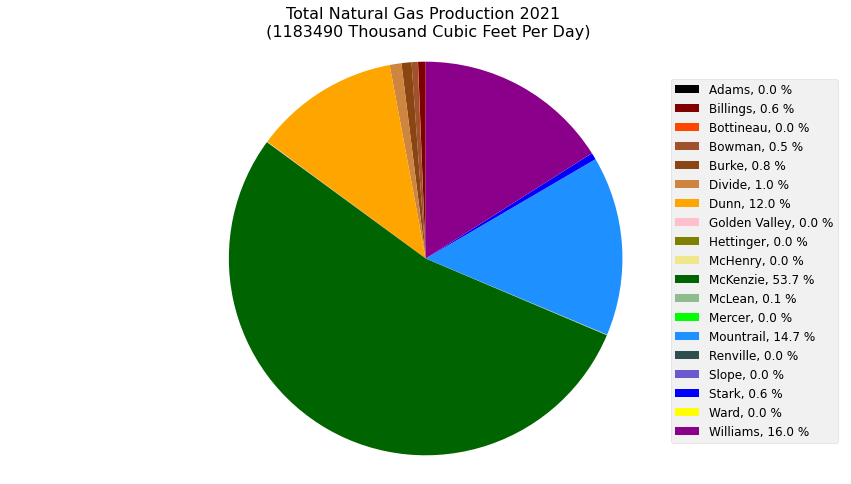

In [31]:
# Create a pie chart for 2021 total natural gas production
ax_8 = df_gas_pie.plot.pie(y = 2021, colors = colors, startangle = 90, labeldistance = None)
ax_8.set_title('Total Natural Gas Production 2021 \n (1183490 Thousand Cubic Feet Per Day)' , fontsize = 16)
ax_8.set_ylabel('')
plt.axis('equal')

# Calculate percentage of county values and store it to legend
percents = df_gas_pie.to_numpy() * 100 / df_gas_pie.to_numpy().sum()
labels = ['%s, %1.1f %%' % (l, s) for l, s in zip(df_gas_pie.index, percents)]
plt.legend(bbox_to_anchor = (0.9,0.5), loc = 'center right', fontsize = 12, bbox_transform = plt.gcf().transFigure,
           labels = labels)